In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Question1 :  Write a function to increase the brightness of an image with image and brightness value as inputs. Verify the function using elephants.jpg.

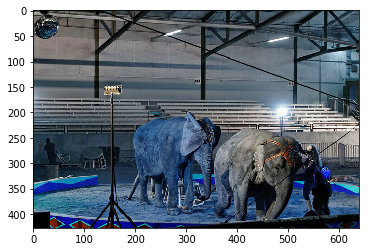

In [2]:
image=cv2.imread('practice_data/elephants.jpg')
plt.imshow(image)

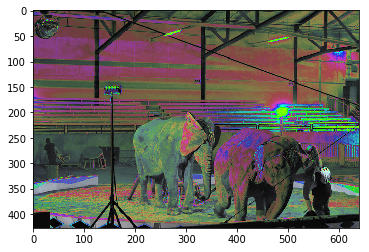

In [3]:
def image_brightness(image, value=10):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    #for handling overflow
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

brighter_image = image_brightness(image,value=10)
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

plt.imshow(brighter_image)

#### Question 2: Create a custom function to translate an image without using any external library. Only use cv2 to load an image and numpy to do all the matrix operations. Verify the function using elephants.jpg

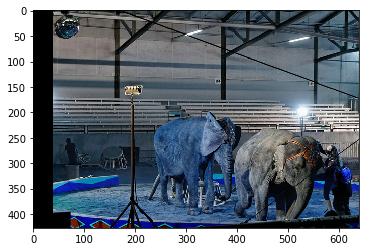

In [18]:
#translating the image pixel by pixel

img = cv2.imread('practice_data/elephants.jpg')

def shift_right(img):
    height = img.shape[0]
    width = img.shape[1];
    for i in range(height):
        for j in range(width-1,0,-1):
            img[i,j] = img[i,j-1]
        img[i,0]=np.array([0,0,0]) 
    return img

for i in range(40):
    new_arr = shift_right(img)
plt.imshow(new_arr)


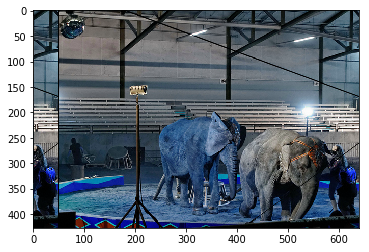

In [38]:
#Translation the image column by column
def shift_right(img,k=50):
    height = img.shape[0]
    width = img.shape[1];
    for i in range(width-1,0,-1):
        img[:,i] = img[:,i-k]
    img[:,0]=np.array([0,0,0]) 
    return img

image = cv2.imread('practice_data/elephants.jpg')
new_arr = shift_right(image,k=50)
plt.imshow(new_arr)


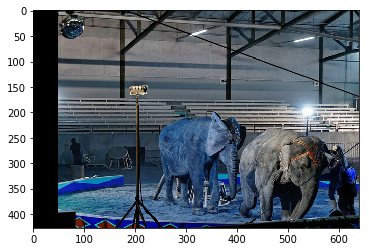

In [34]:
#to shift col and rows and appending the padding to it

img = cv2.imread('practice_data/elephants.jpg')

def shift_left_opt(img,k=50):
    height = img.shape[0]
    width = img.shape[1];
    img = img[:,:width-k]
    img = img[]
    
    pad_right = np.zeros((height,k,3), dtype='uint8')
    img = np.append(img,pad_right,axis=1)
    return img

    new_arr = shift_left_opt(img,k=50)
plt.imshow(new_arr)

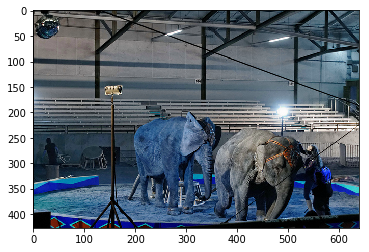

In [24]:
#to shift col and rows and appending the padding to it

img = cv2.imread('practice_data/elephants.jpg')

def shift_right_opt(img,k):
    height = img.shape[0]
    width = img.shape[1];
    img = img[:,k:width]
    
    pad_left = np.zeros((height,k,3), dtype='uint8')
    img = np.append(img,pad_right,axis=1)
    return img

    new_arr = shift_left_opt(img,40)
plt.imshow(new_arr)

### How WarpAffine function works in Translation of Images

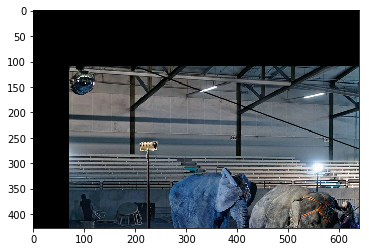

In [10]:
#Case 1 : Image shifts to right and the image is cut
img = cv2.imread('practice_data/elephants.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))

plt.imshow(img_translation)


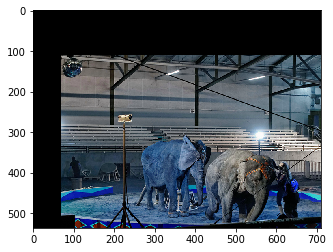

In [4]:
#Case 2 : Image shifts to right but we get the full image

img = cv2.imread('practice_data/elephants.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
plt.imshow(img_translation)

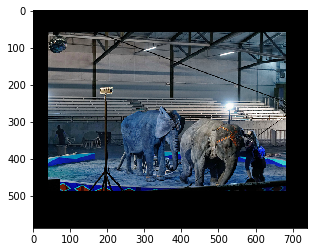

In [5]:
#Case 3 : Image shifts to the centre

img = cv2.imread('practice_data/elephants.jpg')
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))

plt.imshow(img_translation)

In [129]:
a = np.random.randint(10, size=(5,4))
print(a)

[[8 9 7 5]
 [5 2 2 6]
 [2 2 9 3]
 [7 8 3 4]
 [9 4 0 4]]


In [130]:
def shift_right_by_1(a):
    height = a.shape[0]
    width = a.shape[1];
    for i in range(height):
        for j in range(width-1,0,-1):
            a[i,j] = a[i,j-1]
        a[i,0]=0
    return a

new_arr = shift_right_by_1(a)
print(new_arr)

[[0 8 9 7]
 [0 5 2 2]
 [0 2 2 9]
 [0 7 8 3]
 [0 9 4 0]]


In [114]:
def shift_left_by_1(a):
    height = a.shape[0]
    width = a.shape[1];
    for i in range(height):
        for j in range(width-1):
            a[i,j] = a[i,j+1]
        a[i,width-1]=0
    return a

new_arr = shift_left_by_1(a)
print(new_arr)

[[1 3 4 0]
 [8 1 7 0]
 [7 0 5 0]
 [7 4 8 0]
 [8 0 8 0]]
